**Importing Libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files
from keras.utils import np_utils
from keras.preprocessing.image import array_to_img, img_to_array, load_img

**Download and Generate Data**

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d fantacher/neu-metal-surface-defects-data

 85% 49.0M/57.4M [00:03<00:00, 13.2MB/s]
100% 57.4M/57.4M [00:03<00:00, 19.0MB/s]


In [3]:
! unzip '/content/neu-metal-surface-defects-data.zip'

Archive:  /content/neu-metal-surface-defects-data.zip
  inflating: NEU Metal Surface Defects Data/Thumbs.db  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_1.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_10.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_100.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_101.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_102.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_103.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_104.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_105.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_106.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_107.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_108.bmp  
  inflating: NEU Metal Surface Defects Data/test/Crazing/Cr_109.bmp  
  inflating: NEU Metal Surface Defects Data/test/Incl

In [4]:
train_dir= '/content/NEU Metal Surface Defects Data/train'
test_dir= '/content/NEU Metal Surface Defects Data/test'
val_dir= '/content/NEU Metal Surface Defects Data/valid'
print("Inclusion Defect")
print("Training Images:",len(os.listdir(train_dir+'/'+'Inclusion')))
print("Testing Images:",len(os.listdir(test_dir+'/'+'Inclusion')))
print("Validation Images:",len(os.listdir(val_dir+'/'+'Inclusion')))

Inclusion Defect
Training Images: 276
Testing Images: 12
Validation Images: 12


Data consists of 6 classes of data as Training, Test and Validation with 276,12 and 12 images respectively.

**Data Preprocessing**

In [5]:
train_image_gen= ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_image_gen= ImageDataGenerator(rescale=1./225)

def data_generator(q):
    train_generator= train_image_gen.flow_from_directory(
        train_dir,
        target_size= (200,200),
        batch_size= 10,
        class_mode= 'categorical')
    
    valid_generator= test_image_gen.flow_from_directory(
        val_dir,
        target_size= (200,200),
        batch_size= 10,
        class_mode= 'categorical')
    if q==1:
      return train_generator
    else:
      return valid_generator




**Define CNN Architecture**

In [6]:
model= tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(2,2), activation='relu', input_shape= (200,200,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(6, activation='softmax')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 64)       0

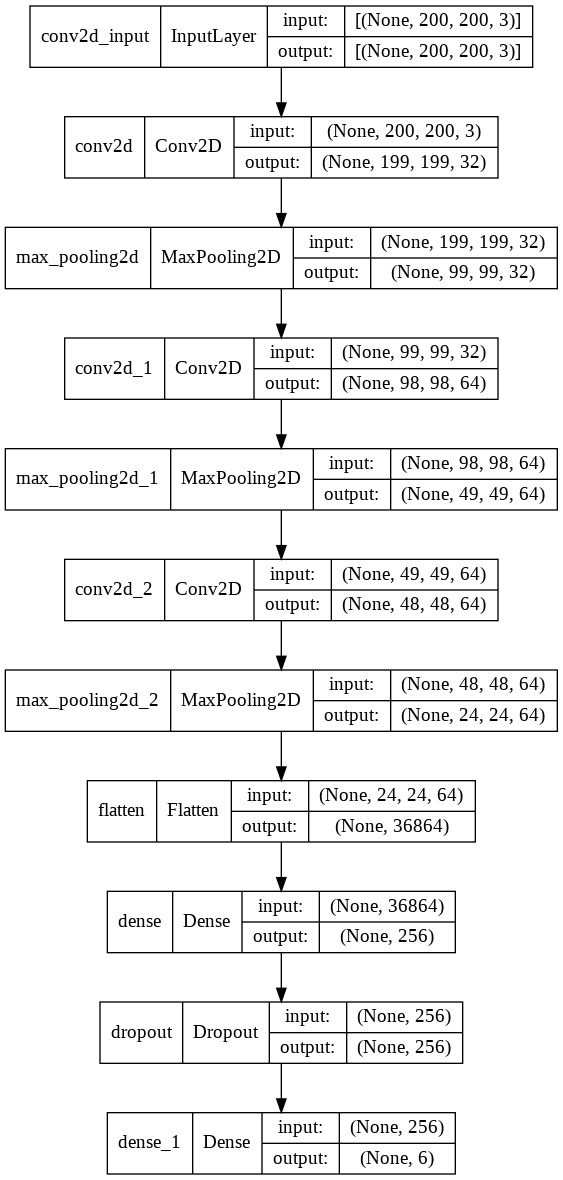

In [7]:
tf.keras.utils.plot_model(
    model,
    to_file='cnn_architecture.png',
    show_shapes=True
)

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [9]:
history = model.fit(data_generator(1),
        batch_size = 32,
        epochs=20,
        validation_data=data_generator(2),
        #callbacks=[callbacks],
        verbose=1, shuffle=True)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Epoch 1/20
166/166 [==============================] - 27s 109ms/step - loss: 1.7252 - accuracy: 0.2325 - val_loss: 1.6079 - val_accuracy: 0.3333
Epoch 2/20
166/166 [==============================] - 17s 104ms/step - loss: 1.5345 - accuracy: 0.3684 - val_loss: 1.5739 - val_accuracy: 0.3472
Epoch 3/20
166/166 [==============================] - 17s 105ms/step - loss: 1.3984 - accuracy: 0.4553 - val_loss: 1.3019 - val_accuracy: 0.5694
Epoch 4/20
166/166 [==============================] - 18s 106ms/step - loss: 1.2703 - accuracy: 0.5272 - val_loss: 0.9842 - val_accuracy: 0.5833
Epoch 5/20
166/166 [==============================] - 18s 108ms/step - loss: 1.1683 - accuracy: 0.5616 - val_loss: 0.8617 - val_accuracy: 0.7083
Epoch 6/20
166/166 [==============================] - 18s 107ms/step - loss: 1.0540 - accuracy: 0.6021 - val_lo

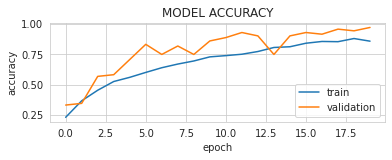


Best Validation Accuracy: 0.9722


<Figure size 432x288 with 0 Axes>

In [15]:
history_df= pd.DataFrame(history.history)
sns.set_style('whitegrid')
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("MODEL ACCURACY")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='lower right')
plt.show()
plt.savefig('model_accuracy.png')
print(("\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_accuracy'].max()))

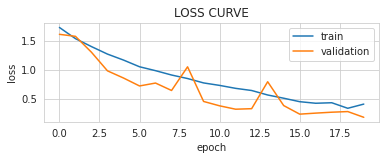


Best Validation Loss: 0.1907


<Figure size 432x288 with 0 Axes>

In [16]:
history_df= pd.DataFrame(history.history)
sns.set_style('whitegrid')
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("LOSS CURVE")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='upper right')
plt.show()
plt.savefig('loss_curve.png')
print(("\nBest Validation Loss: {:0.4f}")\
      .format(history_df['val_loss'].min()))

**Test Results**

In [12]:
def load_dataset(path):
  data = load_files(path)
  files= np.array(data['filenames'])
  targets= np.array(data['target'])
  target_labels=np.array(data['target_names'])
  return files,targets,target_labels

X_test,y_test,target_labels= load_dataset(test_dir)
no_of_class= len(target_labels)
no_of_class

6

In [ ]:
#model=tf.keras.models.load_model('/content/Metal_surface_defect_detector.h5')
#model.save('Metal_surface_defect_detector.h5')

In [20]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

X_test = np.array(convert_image_to_array(X_test))
X_test = X_test.astype('float32')/255
y_test = np_utils.to_categorical(y_test,no_of_class)
print('Test set shape : ',X_test.shape)

Test set shape :  (72, 200, 200, 3)


**Prediction**

Samples classified correctly are shown <font color='green'>**green**</font>, otherwise <font color='red'>**red**</font>.

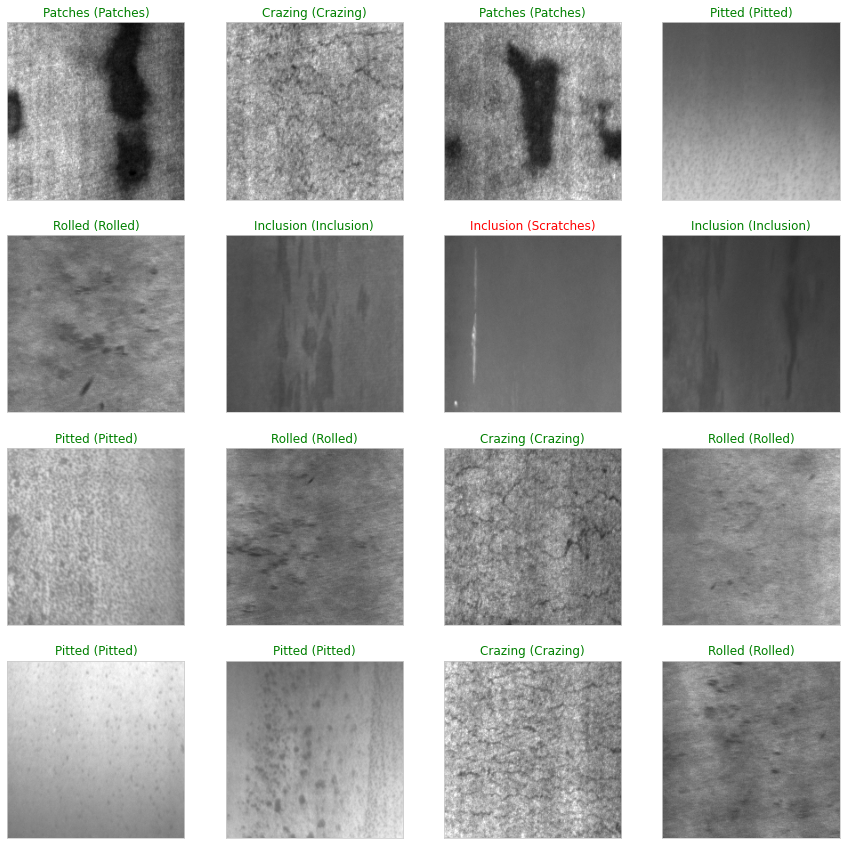

In [22]:
prediction= model.predict(X_test)
fig = plt.figure(figsize=(15, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(prediction[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
plt.savefig('results.png')

In [4]:
! pip install tensorflow
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\ashis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\ashis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\ashis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.2800.0_x64__qbz5n2kfra8p0\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.